# Выполнил: **Филоненко Никита Дмитриевич**

<a href="https://colab.research.google.com/github/NickKar30/GM-HSE-AI-masters-course/blob/main/Hometasks/Base/GenDL_HT1_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание - 1 (базовая группа)

В этом домашнем задании вы потренируетесь решать задачу speech-to-text.

Вы не будете тренировать сложную архитектуру с нуля, а попробуете решить эту задачу, пройдя по пайплайну, в котором задача разбита на несколько простых шагов.

- В этом задании мы призываем вас по-максимуму использовать документацию моделей и получить опыт написания кода без заготовок

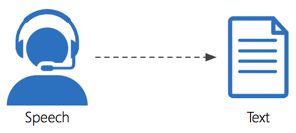

In [1]:
!pip install evaluate -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.7 MB/s eta 0:00:00


## Шаг 1 (1 балл)

* Возьмите датасет https://disk.yandex.ru/d/v2Hipv7XG4fEDQ, содержащий русскоязычные аудиозаписи

* Примените модель [whisper-small](https://huggingface.co/openai/whisper-small) из HF для определения сказанного в аудио.

* Выведите результат работы модели для 10 случайных аудио из датасета

Не стесняйтесь пользоваться документацией и источниками знаний из интернета!

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


data: '/content/drive/MyDrive/HW_GenAI/NLP/urls_normalized.tsv'

In [3]:
import pandas as pd
import torch
from transformers import WhisperProcessor, WhisperForConditionalGeneration
from datasets import Dataset, Audio
import random

random.seed(42)

In [4]:
import torchaudio
torchaudio.set_audio_backend("sox_io")

!pip uninstall torchcodec -y

/tmp/ipython-input-4014988834.py:2: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  torchaudio.set_audio_backend("sox_io")
/usr/local/lib/python3.12/dist-packages/torchaudio/_internal/module_utils.py:71: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  return func(*args, **kwargs)


In [5]:
data_path = '/content/drive/MyDrive/HW_GenAI/NLP/urls_normalized.tsv'
df = pd.read_csv(data_path, sep='\t')

df

,http://storage.mds.yandex.net:80/get-voicetoloka/1872575/197f271b-b23f-4ee0-b240-e956a172d7af
0,http://storage.mds.yandex.net:80/get-voicetolo...
1,http://storage.mds.yandex.net:80/get-voicetolo...
2,http://storage.mds.yandex.net:80/get-voicetolo...
3,http://storage.mds.yandex.net:80/get-voicetolo...
4,http://storage.mds.yandex.net:80/get-voicetolo...
...,...
94,http://storage.mds.yandex.net:80/get-voicetolo...
95,http://storage.mds.yandex.net:80/get-voicetolo...
96,http://storage.mds.yandex.net:80/get-voicetolo...
97,http://storage.mds.yandex.net:80/get-voicetolo...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 1 columns):
 #   Column                                                                                         Non-Null Count  Dtype 
---  ------                                                                                         --------------  ----- 
 0   http://storage.mds.yandex.net:80/get-voicetoloka/1872575/197f271b-b23f-4ee0-b240-e956a172d7af  99 non-null     object
dtypes: object(1)
memory usage: 924.0+ bytes


In [7]:
df = df.rename(columns={df.columns[0]: 'path'})
df

,path
0,http://storage.mds.yandex.net:80/get-voicetolo...
1,http://storage.mds.yandex.net:80/get-voicetolo...
2,http://storage.mds.yandex.net:80/get-voicetolo...
3,http://storage.mds.yandex.net:80/get-voicetolo...
4,http://storage.mds.yandex.net:80/get-voicetolo...
...,...
94,http://storage.mds.yandex.net:80/get-voicetolo...
95,http://storage.mds.yandex.net:80/get-voicetolo...
96,http://storage.mds.yandex.net:80/get-voicetolo...
97,http://storage.mds.yandex.net:80/get-voicetolo...


In [8]:
dataset = Dataset.from_dict({"audio_path": df["path"].tolist()})

processor = WhisperProcessor.from_pretrained("openai/whisper-small")
model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-small")
forced_decoder_ids = processor.get_decoder_prompt_ids(language="russian", task="transcribe")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

normalizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json: 0.00B [00:00, ?B/s]

In [ ]:
def process_audio(batch):
    try:
        path = batch["audio_path"]
        waveform, sr = torchaudio.load(path)

        audio_tensor = waveform.squeeze(0).to(torch.float32)

        if sr != 16000:
            audio_tensor = torchaudio.functional.resample(audio_tensor, orig_freq=sr, new_freq=16000)
            sr = 16000

        device = next(model.parameters()).device
        audio_tensor = audio_tensor.to(device)

        inputs = processor(audio_tensor, sampling_rate=sr, return_tensors="pt").to(device)
        input_features = inputs.input_features

        with torch.no_grad():
            predicted_ids = model.generate(input_features, forced_decoder_ids=forced_decoder_ids)

        transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)[0]
        return {"transcription": transcription}

    except Exception as e:
        print(f"Error processing audio: {e}")
        return {"transcription": "Error in transcription"}

In [ ]:
random_indices = random.sample(range(len(dataset)), 10)
subset = dataset.select(random_indices)

print("\nTranscription results для 10 случайных файлов:")
print("=" * 60)

result = subset.map(process_audio)

for i, item in enumerate(result):
    print(f"Аудио {i+1}:")
    print(f"Транскрипция: {item['transcription']}\n")
    print("-" * 40)


Transcription results для 10 случайных файлов:


Map:   0%|          | 0/10 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be r

Error processing audio: operands could not be broadcast together with remapped shapes [original->remapped]: (2,2)  and requested shape (3,2)
Аудио 1:
Транскрипция:  Унесённый ветром.

----------------------------------------
Аудио 2:
Транскрипция:  Криминальная чтива.

----------------------------------------
Аудио 3:
Транскрипция:  Мохаммед Али

----------------------------------------
Аудио 4:
Транскрипция:  Помни!

----------------------------------------
Аудио 5:
Транскрипция: Error in transcription

----------------------------------------
Аудио 6:
Транскрипция:  Ледниковый период

----------------------------------------
Аудио 7:
Транскрипция:  Интерстеллер

----------------------------------------
Аудио 8:
Транскрипция:  Бил на и

----------------------------------------
Аудио 9:
Транскрипция:  Андрей Сахаров

----------------------------------------
Аудио 10:
Транскрипция:  Франциска Писсера

----------------------------------------


## Шаг 2 (1 балл)

Текст распознается с ошибками.
Попробуйте исправить ошибки с помощью готовой (предобученной) модели spell correction.

Выведите на экран 10 текстов с предыдущего шага и их исправления с помощью модели https://huggingface.co/UrukHan/t5-russian-spell.

In [9]:
from transformers import T5ForConditionalGeneration, T5TokenizerFast

In [ ]:
model_name = 'UrukHan/t5-russian-spell'

tokenizer = T5TokenizerFast.from_pretrained(model_name)

model = T5ForConditionalGeneration.from_pretrained(model_name)


original_transcriptions = [
    "Унесённый ветром.",
    "Криминальная чтива.",
    "Мохаммед Али",
    "Помни!",
    "адвокат делала",
    "Ледниковый период",
    "Интерстеллер",
    "Бил на и",
    "Андрей Сахаров",
    "Франциска Писсера"
]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/1.00M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

In [ ]:
def correct_spelling(texts):
    if not isinstance(texts, list):
        texts = [texts]

    task_prefix = "Spell correct: "
    input_sequences = [task_prefix + text for text in texts]

    encoded = tokenizer(
        input_sequences,
        padding="longest",
        max_length=256,
        truncation=True,
        return_tensors="pt"
    )

    with torch.no_grad():
        predicts = model.generate(
            **encoded,
            max_length=256,
            num_beams=5,
            early_stopping=True
        )

    corrections = tokenizer.batch_decode(predicts, skip_special_tokens=True)
    return corrections

In [ ]:
corrected_transcriptions = correct_spelling(original_transcriptions)

print("Original vs Corrected Transcriptions:")
print("=" * 50)
for i, (original, corrected) in enumerate(zip(original_transcriptions, corrected_transcriptions), 1):
    print(f"Аудио {i}:")
    print(f"Оригинал: {original}")
    print(f"Исправлено: {corrected}")
    print("-" * 40)

Original vs Corrected Transcriptions:
Аудио 1:
Оригинал: Унесённый ветром.
Исправлено: Унесённый ветром.
----------------------------------------
Аудио 2:
Оригинал: Криминальная чтива.
Исправлено: Криминальная книга.
----------------------------------------
Аудио 3:
Оригинал: Мохаммед Али
Исправлено: Мохаммед Али
----------------------------------------
Аудио 4:
Оригинал: Помни!
Исправлено: Помни!
----------------------------------------
Аудио 5:
Оригинал: адвокат делала
Исправлено: Адвокат делала.
----------------------------------------
Аудио 6:
Оригинал: Ледниковый период
Исправлено: Ледниковый период
----------------------------------------
Аудио 7:
Оригинал: Интерстеллер
Исправлено: Интерстеллер
----------------------------------------
Аудио 8:
Оригинал: Бил на и
Исправлено: Бил на и.
----------------------------------------
Аудио 9:
Оригинал: Андрей Сахаров
Исправлено: Андрей Сахаров
----------------------------------------
Аудио 10:
Оригинал: Франциска Писсера
Исправлено: Франци

## Шаг 3 (2 балла)

Соберите данные для дообучения модели выше. Для дообучения мы предлагаем вам использовать бесплатный api Groq: https://console.groq.com/docs/quickstart

Разберитесь с тем как пользоваться api (мы немного поможем вам с этим кодом ниже) и с его помощью соберите датасет (можно в несколько запросов).

- **0.5 балла** ставится за сбор датасета размером >1000 строк и сохранение в локальный файл/файлы

- **еще 0.5 балла** ставится за [создание huggingface dataset](https://huggingface.co/docs/datasets/create_dataset) (через использование библиотек datasets и huggingface) и [сохранение собранного датасета напрямую в HuggingFace](https://huggingface.co/docs/datasets/upload_dataset)

- **еще 1 балл** ставится за сбор датасета размером >1000 строк, на котором путем дообучения получится увеличить качество исправления опечаток в поставленной задаче (см. шаг 6) по сравнению с качеством прогноза той же, но предобученной модели

P.S. Если у Вас нет VPN, то можете воспользоваться другой LLM на Ваш выбор (можно, например, этим https://ollama.com/).

In [ ]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.4 MB/s eta 0:00:00


In [ ]:
import os
import json
import pandas as pd
from groq import Groq
import time
from datasets import Dataset, DatasetDict
import huggingface_hub

у Groq привышен лимит на llama-3.3-70b-versatile

```
Ошибка в образце 21: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama-3.3-70b-versatile` in organization `org_01k7k88drme8e9de5ybgpkjz5e` service tier `on_demand` on tokens per day (TPD): Limit 100000, Used 99995, Requested 93. Please try again in 1m16.032s. Need more tokens? Upgrade to Dev Tier today at https://console.groq.com/settings/billing', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}
```

поэтому будем использовать llama-3.1-8b-instant

In [ ]:
# зайдите на страницу и создайте API KEY: https://console.groq.com/keys - возможно, понадобится включить VPN

import os

os.environ["GROQ_API_KEY"] = '...'

In [ ]:
import os
from groq import Groq

client = Groq(api_key=os.environ.get("GROQ_API_KEY"))

def generate_spelling_data(prompt_template, num_samples=80):
    responses = []

    for i in range(num_samples):
        try:
            current_prompt = prompt_template.format(num_pairs=8)

            response = client.chat.completions.create(
                messages=[{"role": "user", "content": current_prompt}],
                model="llama-3.1-8b-instant",
                temperature=0.8,
                max_tokens=2500,
                top_p=0.9
            )

            content = response.choices[0].message.content
            responses.append(content)

            print(f"Успешно сгенерирован образец {i+1}")

            if i % 8 == 0:
                time.sleep(2)

        except Exception as e:
            print(f"Ошибка в образце {i}: {e}")
            continue

    return responses

In [ ]:
prompt_templates = [
    """Сгенерируй {num_pairs} пар русских текстов для обучения исправлению орфографических ошибок. Каждая пара должна содержать:
    - Исходный текст с распространенными русскими орфографическими ошибками (опечатки, фонетические ошибки, грамматические ошибки)
    - Исправленную версию с правильной русской орфографией
    Формат: "ОШИБКА: <текст> | ИСПРАВЛЕНИЕ: <текст>"

    Сфокусируйся на этих типах ошибок:
    1. Ошибки раскладки клавиатуры (английская раскладка при наборе русского текста)
    2. Фонетические (о/а, е/и, тсь/ться, -тся/-ться)
    3. Распространенные грамматические ошибки
    4. Пунктуация и заглавные буквы
    5. Ошибки в границах слов
    6. Пропущенные или лишние буквы

    Примеры:
    ОШИБКА: Привет как дела | ИСПРАВЛЕНИЕ: Привет, как дела?
    ОШИБКА: Она пришла вчерашним вечиром | ИСПРАВЛЕНИЕ: Она пришла вчерашним вечером
    ОШИБКА: Йто очень важное сообщение | ИСПРАВЛЕНИЕ: Это очень важное сообщение
    """,

    """Создай {num_pairs} пар русских предложений с реалистичными опечатками:
    - Включи пропущенные буквы, лишние буквы, неправильный порядок букв
    - Смешивай короткие и длинные предложения
    - Включи разные контексты: формальный, неформальный, технический, повседневный
    - Добавь ошибки в падежах, спряжениях глаголов
    Формат каждой пары: "ОШИБКА: <текст> | ИСПРАВЛЕНИЕ: <текст>"
    """,

    """Сгенерируй {num_pairs} примеров исправления русских текстов, focusing на:
    - Ошибки в падежах существительных и прилагательных
    - Ошибки в спряжении глаголов
    - Ошибки в предлогах и частицах
    - Слитное и раздельное написание слов
    - Ударения и безударные гласные
    Формат: "ОШИБКА: <текст> | ИСПРАВЛЕНИЕ: <текст>"
    """
]

In [ ]:
import re

def parse_response(response_text):
    pairs = []
    lines = response_text.strip().split('\n')

    for line in lines:
        line = line.strip()
        if not line:
            continue

        patterns = [
            r'ОШИБКА:\s*(.*?)\s*\|\s*ИСПРАВЛЕНИЕ:\s*(.*)',
            r'ERROR:\s*(.*?)\s*\|\s*FIXED:\s*(.*)',
            r'TYPO:\s*(.*?)\s*\|\s*CORRECTED:\s*(.*)',
            r'INCORRECT:\s*(.*?)\s*\|\s*CORRECT:\s*(.*)',
            r'([^|]+)\|\s*([^|]+)'
        ]

        for pattern in patterns:
            match = re.search(pattern, line, re.IGNORECASE)
            if match:
                incorrect = match.group(1).strip()
                correct = match.group(2).strip()

                if (incorrect and correct and
                    len(incorrect) > 3 and len(correct) > 3 and
                    incorrect != correct):
                    pairs.append({'incorrect': incorrect, 'correct': correct})
                break

    return pairs

 сбор датасета размером >1000 строк и сохранение в локальный файл/файлы

In [ ]:
def collect_comprehensive_dataset():
    all_data = []

    prompt_templates = [
        """Сгенерируй {num_pairs} пар русских текстов для обучения исправлению орфографических ошибок. Каждая пара должна содержать:
        - Исходный текст с распространенными русскими орфографическими ошибками
        - Исправленную версию с правильной русской орфографией
        Формат: "ОШИБКА: <текст> | ИСПРАВЛЕНИЕ: <текст>"
        """,

        """Создай {num_pairs} пар русских предложений с реалистичными опечатками разных типов.
        Формат: "ОШИБКА: <текст> | ИСПРАВЛЕНИЕ: <текст>"
        """,

        """Сгенерируй {num_pairs} примеров исправления русских текстов с грамматическими ошибками.
        Формат: "ОШИБКА: <текст> | ИСПРАВЛЕНИЕ: <текст>"
        """
    ]

    for prompt_idx, template in enumerate(prompt_templates):
        print(f"Сбор батча {prompt_idx + 1}/{len(prompt_templates)}...")

        responses = generate_spelling_data(template, num_samples=120)

        for response_idx, response in enumerate(responses):
            try:
                pairs = parse_response(response)
                all_data.extend(pairs)
                print(f"Батч {prompt_idx+1}, ответ {response_idx+1}: добавлено {len(pairs)} пар")

            except Exception as e:
                print(f"Ошибка парсинга в батче {prompt_idx+1}, ответ {response_idx+1}: {e}")
                continue

        print(f"Батч {prompt_idx + 1} завершен. Всего образцов: {len(all_data)}")

        if len(all_data) >= 1000:
            print("Достигнута цель в 1000+ образцов!")
            break

        time.sleep(5)

    return all_data

In [ ]:
print("Starting data collection...")
dataset_pairs = collect_comprehensive_dataset()

print(f"Collected {len(dataset_pairs)} samples")

Starting data collection...
Сбор батча 1/3...
Успешно сгенерирован образец 1
Успешно сгенерирован образец 2
Успешно сгенерирован образец 3
Успешно сгенерирован образец 4
Успешно сгенерирован образец 5
Успешно сгенерирован образец 6
Успешно сгенерирован образец 7
Успешно сгенерирован образец 8
Успешно сгенерирован образец 9
Успешно сгенерирован образец 10
Успешно сгенерирован образец 11
Успешно сгенерирован образец 12
Успешно сгенерирован образец 13
Успешно сгенерирован образец 14
Успешно сгенерирован образец 15
Успешно сгенерирован образец 16
Успешно сгенерирован образец 17
Успешно сгенерирован образец 18
Успешно сгенерирован образец 19
Успешно сгенерирован образец 20
Успешно сгенерирован образец 21
Успешно сгенерирован образец 22
Успешно сгенерирован образец 23
Успешно сгенерирован образец 24
Успешно сгенерирован образец 25
Успешно сгенерирован образец 26
Успешно сгенерирован образец 27
Успешно сгенерирован образец 28
Успешно сгенерирован образец 29
Успешно сгенерирован образец 30
Усп

In [ ]:
def save_dataset_locally(data_pairs, base_filename="russian_spell_correction"):
    df = pd.DataFrame(data_pairs)

    initial_count = len(df)
    df = df.drop_duplicates(subset=['incorrect'])
    final_count = len(df)

    print(f"После удаления дубликатов: {final_count} из {initial_count} образцов")

    df.to_csv(f'{base_filename}.csv', index=False, encoding='utf-8')
    df.to_json(f'{base_filename}.json', orient='records', force_ascii=False, indent=2)

    with open(f'{base_filename}.jsonl', 'w', encoding='utf-8') as f:
        for item in data_pairs:
            f.write(json.dumps(item, ensure_ascii=False) + '\n')

    print(f"Датасет сохранен в файлы:")
    print(f"- {base_filename}.csv")
    print(f"- {base_filename}.json")
    print(f"- {base_filename}.jsonl")

    return df

In [ ]:
df = save_dataset_locally(dataset_pairs)
print("Dataset saved!")

После удаления дубликатов: 1805 из 1974 образцов
Датасет сохранен в файлы:
- russian_spell_correction.csv
- russian_spell_correction.json
- russian_spell_correction.jsonl
Dataset saved!


 создание huggingface dataset (через использование библиотек datasets и huggingface) и сохранение собранного датасета напрямую в HuggingFace

In [12]:
dataset_pairs = pd.read_csv('/content/drive/MyDrive/HW_GenAI/NLP/russian_spell_correction.csv', sep=',')
dataset_pairs

,incorrect,correct
0,Мне нравится гулять по парку,Мне нравится гулять в парке
1,Я люблю читать книгу,Я люблю читать книги
2,Девушка очень красивая,Девушка очень красивая (исправление не требует...
3,Вчера я ел бургер,Вчера я ел бургеры
4,Мне нравится слушать музыку,Мне нравится слушать музыку (исправление не тр...
...,...,...
1800,"Мне нравится ходить на фестиваль, на котором я...","Мне нравится ходить на фестиваль, на котором я..."
1801,"Вчера я сходил на работу в гараж, где я живу.","Вчера я сходил на работу в гараж, где я работаю."
1802,"У меня есть три компьютера: айфон, хауэй и тив...","У меня есть три компьютера: айфон, хуавей и ти..."
1803,Я родился в 21.12.1995 году.,Мне 28 лет и я родился в 1995 году.


In [13]:
!pip install huggingface_hub

In [ ]:
from huggingface_hub import login

try:
    login(token='...')
    print("Успешно выполнен логин в HuggingFace")
except Exception as e:
    print(f"Ошибка логина в HuggingFace: {e}")
    print("Убедитесь, что переменная окружения HF_TOKEN установлена или используйте login(token='hf_xxxx')")
    raise

Успешно выполнен логин в HuggingFace


In [ ]:
def create_and_upload_hf_dataset(data_pairs, dataset_name="your_username/russian-spell-correction-dataset"):
    try:
        if isinstance(data_pairs, pd.DataFrame):
            data_pairs = data_pairs.to_dict(orient='records')
        elif not isinstance(data_pairs, list):
            raise ValueError("data_pairs должен быть списком словарей или pandas DataFrame")

        if not data_pairs:
            raise ValueError("data_pairs пустой")

        hf_dataset = Dataset.from_list(data_pairs)

        dataset_dict = DatasetDict({
            'train': hf_dataset
        })

        dataset_dict.push_to_hub(dataset_name)
        print(f"Датасет успешно загружен на Hugging Face: https://huggingface.co/datasets/{dataset_name}")
        return hf_dataset

    except Exception as e:
        print(f"Ошибка при загрузке на Hugging Face: {e}")
        print("Убедитесь, что:")
        print("- Вы вошли в HuggingFace (HF_TOKEN с правами Write)")
        print("- dataset_name имеет формат 'your_username/repo_name'")
        print("- data_pairs содержит валидные данные (список словарей)")
        return None

In [ ]:
if len(dataset_pairs) >= 1000:
    hf_dataset = create_and_upload_hf_dataset(dataset_pairs, dataset_name="nikfil/russian-spell-correction-dataset")
else:
    print(f"Недостаточно данных для загрузки. Собрано: {len(dataset_pairs)} из 1000 требуемых")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

                              : 100%|##########|  146kB /  146kB            

Датасет успешно загружен на Hugging Face: https://huggingface.co/datasets/nikfil/russian-spell-correction-dataset


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=SyntaxWarning)

In [ ]:
print("GPU available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))

GPU available: True
GPU name: Tesla T4


In [ ]:
model_name = "UrukHan/t5-russian-spell"
tokenizer = T5TokenizerFast.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name).to("cuda")

In [ ]:
from sklearn.model_selection import train_test_split
from datasets import Dataset

train_pairs, test_pairs = train_test_split(dataset_pairs, test_size=0.2, random_state=42)

train_dataset = Dataset.from_pandas(train_pairs)
test_dataset = Dataset.from_pandas(test_pairs)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Train dataset size: 1444
Test dataset size: 361


In [ ]:
from transformers import T5ForConditionalGeneration, T5TokenizerFast

model_name = "UrukHan/t5-russian-spell"
tokenizer = T5TokenizerFast.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

def preprocess_function(examples):
    inputs = ["Spell correct: " + text for text in examples["incorrect"]]
    targets = examples["correct"]
    model_inputs = tokenizer(inputs, max_length=256, truncation=True, padding="max_length")
    labels = tokenizer(targets, max_length=256, truncation=True, padding="max_length").input_ids
    model_inputs["labels"] = labels
    return model_inputs

train_dataset = train_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
test_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

Map:   0%|          | 0/1444 [00:00<?, ? examples/s]

Map:   0%|          | 0/361 [00:00<?, ? examples/s]

In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    weight_decay=0.01,
    save_strategy="epoch",
    load_best_model_at_end=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

trainer.train()

model.save_pretrained("./finetuned_t5_russian_spell")
tokenizer.save_pretrained("./finetuned_t5_russian_spell")

Epoch,Training Loss,Validation Loss
1,No log,0.064065
2,No log,0.058897


/usr/local/lib/python3.12/dist-packages/transformers/modeling_utils.py:3922: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 256}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


('./finetuned_t5_russian_spell/tokenizer_config.json',
 './finetuned_t5_russian_spell/special_tokens_map.json',
 './finetuned_t5_russian_spell/spiece.model',
 './finetuned_t5_russian_spell/added_tokens.json',
 './finetuned_t5_russian_spell/tokenizer.json')

In [ ]:
!pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 63.1 MB/s eta 0:00:00


In [ ]:
from Levenshtein import distance

def evaluate_model(model, tokenizer, test_pairs):
    predictions = []
    for text in test_pairs["incorrect"]:
        inputs = tokenizer("Spell correct: " + text, return_tensors="pt", max_length=256, truncation=True, padding=True)
        with torch.no_grad():
            outputs = model.generate(**inputs, max_length=256, num_beams=5, early_stopping=True)
        prediction = tokenizer.decode(outputs[0], skip_special_tokens=True)
        predictions.append(prediction)

    edit_distances = [distance(pred, true) for pred, true in zip(predictions, test_pairs["correct"])]
    avg_edit_distance = sum(edit_distances) / len(edit_distances)
    return avg_edit_distance, predictions

# Оценка предобученной модели
pretrained_model = T5ForConditionalGeneration.from_pretrained(model_name)
pretrained_score, pretrained_predictions = evaluate_model(pretrained_model, tokenizer, test_pairs)

# Оценка дообученной модели
finetuned_model = T5ForConditionalGeneration.from_pretrained("./finetuned_t5_russian_spell")
finetuned_score, finetuned_predictions = evaluate_model(finetuned_model, tokenizer, test_pairs)

In [ ]:
print(f"Предобученная модель: среднее edit distance = {pretrained_score:.2f}")
print(f"Дообученная модель: среднее edit distance = {finetuned_score:.2f}")

print("\nПримеры исправлений (первые 5):")
for i in range(5):
    print(f"Оригинал: {test_pairs['incorrect'].iloc[i]}")
    print(f"Истина: {test_pairs['correct'].iloc[i]}")
    print(f"Предобученная: {pretrained_predictions[i]}")
    print(f"Дообученная: {finetuned_predictions[i]}")
    print("-" * 40)

Предобученная модель: среднее edit distance = 18.65
Дообученная модель: среднее edit distance = 18.63

Примеры исправлений (первые 5):
Оригинал: Я вчера видел фильм "Война и мире"
Истина: Я вчера видел фильм "Война и мир"
Предобученная: Я вчера видел фильм "Война и мир"
Дообученная: Я вчера видел фильм "Война и мир"
----------------------------------------
Оригинал: Мне нравится слушать музыку и танцевать с друзьями
Истина: Мне нравится слушать музыку и танцевать с друзьями (в данном случае нет орфографической ошибки, попробую еще раз)
Предобученная: Мне нравится слушать музыку и танцевать с друзьями.
Дообученная: Мне нравится слушать музыку и танцевать с друзьями.
----------------------------------------
Оригинал: Мне нравится читать книги в библиотеке
Истина: Мне нравится читать книги в библиотеке.
Предобученная: Мне нравится читать книги в библиотеке.
Дообученная: Мне нравится читать книги в библиотеке.
----------------------------------------
Оригинал: Мне нужно купить молоко, яйца

In [ ]:
model_name = "UrukHan/t5-russian-spell"
tokenizer = T5TokenizerFast.from_pretrained(model_name)
pretrained_model = T5ForConditionalGeneration.from_pretrained(model_name).to("cuda")
finetuned_model = T5ForConditionalGeneration.from_pretrained("./finetuned_t5_russian_spell").to("cuda")

In [ ]:
original_transcriptions = [
    "Унесённый ветром.",
    "Криминальная чтива.",
    "Мохаммед Али",
    "Помни!",
    "адвокат делала",
    "Ледниковый период",
    "Интерстеллер",
    "Бил на и",
    "Андрей Сахаров",
    "Франциска Писсера"
]

def correct_spelling_finetuned(texts):
    if not isinstance(texts, list):
        texts = [texts]
    inputs = tokenizer(
        ["Spell correct: " + text for text in texts],
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=256
    ).to("cuda")
    with torch.no_grad():
        outputs = finetuned_model.generate(**inputs, max_length=256, num_beams=5, early_stopping=True)
    return tokenizer.batch_decode(outputs, skip_special_tokens=True)


def correct_spelling(texts):
    if not isinstance(texts, list):
        texts = [texts]
    inputs = tokenizer(
        ["Spell correct: " + text for text in texts],
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=256
    ).to("cuda")
    with torch.no_grad():
        outputs = pretrained_model.generate(**inputs, max_length=256, num_beams=5, early_stopping=True)
    return tokenizer.batch_decode(outputs, skip_special_tokens=True)

In [ ]:
pretrained_corrections = correct_spelling(original_transcriptions)
finetuned_corrections = correct_spelling_finetuned(original_transcriptions)

print("\nСравнение исправлений на транскрипциях:")
print("=" * 50)
for i, (orig, pre, fine) in enumerate(zip(original_transcriptions, pretrained_corrections, finetuned_corrections), 1):
    print(f"Аудио {i}:")
    print(f"Оригинал: {orig}")
    print(f"Предобученная: {pre}")
    print(f"Дообученная: {fine}")
    print("-" * 40)


Сравнение исправлений на транскрипциях:
Аудио 1:
Оригинал: Унесённый ветром.
Предобученная: Унесённый ветром.
Дообученная: Унесённый ветром.
----------------------------------------
Аудио 2:
Оригинал: Криминальная чтива.
Предобученная: Криминальная книга.
Дообученная: Криминальная чтива
----------------------------------------
Аудио 3:
Оригинал: Мохаммед Али
Предобученная: Мохаммед Али
Дообученная: Мохаммед Али
----------------------------------------
Аудио 4:
Оригинал: Помни!
Предобученная: Помни!
Дообученная: Помним!
----------------------------------------
Аудио 5:
Оригинал: адвокат делала
Предобученная: Адвокат делала.
Дообученная: Адвокат делала.
----------------------------------------
Аудио 6:
Оригинал: Ледниковый период
Предобученная: Ледниковый период
Дообученная: Ледниковый период
----------------------------------------
Аудио 7:
Оригинал: Интерстеллер
Предобученная: Интерстеллер
Дообученная: Интерстеллер
----------------------------------------
Аудио 8:
Оригинал: Бил на и
П

есть улучшения

## Шаг 4 (2 балла)

Дообучите модель выше или любую другую модель, которая вам нравится, на собранных данных и протестируйте ее на нескольких ошибочно распознанных whisper-small моделью аудио. Дообучение мы разбирали на семинаре - можете посмотреть, как мы это делали там.

Для оценки качества результата выведите на экран 10 текстов с предыдущего шага и их исправления с помощью модели.

- Вы можете воспользовать структурой, предложенной в ячейке ниже, а можете написать код по-своему.

In [19]:
!pip install --upgrade transformers datasets accelerate evaluate sentencepiece sacrebleu python-Levenshtein -q

In [20]:
import os
import pandas as pd
import torch
from datasets import Dataset, DatasetDict

from transformers import (
    AutoTokenizer, AutoModelForSeq2SeqLM,
    DataCollatorForSeq2Seq, Seq2SeqTrainer, Seq2SeqTrainingArguments
)

from sklearn.model_selection import train_test_split
from Levenshtein import distance as lev_distance
import evaluate

1. Настройки

In [22]:
BASE_MODEL = "UrukHan/t5-russian-spell"
DATA_PATH = "/content/drive/MyDrive/HW_GenAI/NLP/russian_spell_correction.csv"
OUTPUT_DIR = "/content/finetuned_t5_russian_spell"
EPOCHS = 3
BATCH_SIZE = 8
LR = 2e-5
SEED = 42
PREFIX = "Spell correct: "

torch.manual_seed(SEED)
device = "cuda" if torch.cuda.is_available() else "cpu"

print("Device:", device)

Device: cuda


2. Загрузка датасета

In [24]:
df = pd.read_csv(DATA_PATH)
df = df.dropna(subset=["incorrect", "correct"])
df = df.drop_duplicates(subset=["incorrect"])
print(f"Загружено {len(df)} строк")

train_df, test_df = train_test_split(df, test_size=0.1, random_state=SEED)
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)
dataset = DatasetDict({"train": train_dataset, "validation": test_dataset})

Загружено 1805 строк


3. Токенизация

In [25]:
tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)
model = AutoModelForSeq2SeqLM.from_pretrained(BASE_MODEL).to(device)

MAX_LEN = 256

def preprocess(examples):
    inputs = [PREFIX + s for s in examples["incorrect"]]
    model_inputs = tokenizer(inputs, max_length=MAX_LEN, truncation=True, padding="max_length")
    labels = tokenizer(examples["correct"], max_length=MAX_LEN, truncation=True, padding="max_length").input_ids
    model_inputs["labels"] = labels
    return model_inputs

tokenized = dataset.map(preprocess, batched=True)
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

Map:   0%|          | 0/1624 [00:00<?, ? examples/s]

Map:   0%|          | 0/181 [00:00<?, ? examples/s]

4. Настройки обучения

In [31]:
args = Seq2SeqTrainingArguments(
    output_dir=OUTPUT_DIR,
    learning_rate=LR,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    weight_decay=0.01,
    num_train_epochs=EPOCHS,
    predict_with_generate=True,
    fp16=torch.cuda.is_available(),
    logging_dir=f"{OUTPUT_DIR}/logs",
    logging_steps=100,
    save_total_limit=2,
    report_to="none"
)


In [32]:
trainer = Seq2SeqTrainer(
    model=model,
    args=args,
    train_dataset=tokenized["train"],
    eval_dataset=tokenized["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
)

/tmp/ipython-input-1388364285.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


5. Обучение

In [33]:
print("Начинаем обучение...")
trainer.train()
print("Обучение завершено.")

trainer.save_model(OUTPUT_DIR)
tokenizer.save_pretrained(OUTPUT_DIR)
print(f"Модель сохранена в {OUTPUT_DIR}")

Начинаем обучение...


Step,Training Loss
100,0.059800
200,0.073000
300,0.059700
400,0.058000
500,0.050600
600,0.051900


/usr/local/lib/python3.12/dist-packages/transformers/modeling_utils.py:3918: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 256}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


Обучение завершено.
Модель сохранена в /content/finetuned_t5_russian_spell


Примените дообученную модель. Как раз здесь для оценки качества результата выведите на экран 10 текстов с предыдущего шага и их исправления с помощью модели.

6. Применение дообученной модели

In [34]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_path = OUTPUT_DIR
tokenizer_finetuned = AutoTokenizer.from_pretrained(model_path)
model_finetuned = AutoModelForSeq2SeqLM.from_pretrained(model_path).to(device)

original_transcriptions = [
    "Унесённый ветром.",
    "Криминальная чтива.",
    "Мохаммед Али",
    "Помни!",
    "адвокат делала",
    "Ледниковый период",
    "Интерстеллер",
    "Бил на и",
    "Андрей Сахаров",
    "Франциска Писсера"
]

def correct_texts(texts, model, tokenizer):
    inputs = [PREFIX + t for t in texts]
    encoded = tokenizer(inputs, return_tensors="pt", padding=True, truncation=True, max_length=MAX_LEN).to(device)
    with torch.no_grad():
        outputs = model.generate(**encoded, max_length=MAX_LEN, num_beams=5)
    return tokenizer.batch_decode(outputs, skip_special_tokens=True)


Предобученная и дообученная

In [35]:
tokenizer_pre = AutoTokenizer.from_pretrained(BASE_MODEL)
model_pre = AutoModelForSeq2SeqLM.from_pretrained(BASE_MODEL).to(device)

pretrained_corr = correct_texts(original_transcriptions, model_pre, tokenizer_pre)
finetuned_corr = correct_texts(original_transcriptions, model_finetuned, tokenizer_finetuned)

Вывод результатов

In [36]:
print("\nСравнение предобученной и дообученной модели")
print("="*70)

for i, orig in enumerate(original_transcriptions):
    pre = pretrained_corr[i]
    fine = finetuned_corr[i]
    print(f"Аудио {i+1}:")
    print(f"Оригинал: {orig}")
    print(f"Предобученная: {pre}")
    print(f"Дообученная:   {fine}")
    print("-"*60)


Сравнение предобученной и дообученной модели
Аудио 1:
Оригинал: Унесённый ветром.
Предобученная: Унесённый ветром.
Дообученная:   Унесённый ветром.
------------------------------------------------------------
Аудио 2:
Оригинал: Криминальная чтива.
Предобученная: Криминальная чтива.
Дообученная:   Криминальная чтива.
------------------------------------------------------------
Аудио 3:
Оригинал: Мохаммед Али
Предобученная: Мохаммед Али
Дообученная:   Мохаммед Али
------------------------------------------------------------
Аудио 4:
Оригинал: Помни!
Предобученная: Помни!. . .
Дообученная:   Помним! (в данном случае ошибок нет)
------------------------------------------------------------
Аудио 5:
Оригинал: адвокат делала
Предобученная: Адвокат делала.
Дообученная:   Адвокат сделала (в данном случае ошибок нет)
------------------------------------------------------------
Аудио 6:
Оригинал: Ледниковый период
Предобученная: Ледниковый период
Дообученная:   Ледниковый период
----------------

## Шаг 5 (1 балл)

Время считать метрики и возвращаться к дообучению модели по необходимости. В этом шаге мы оцениваем только выполнение задания, а не значения метрик.

a) [Здесь](https://disk.yandex.ru/d/SPJU3lCt_cMDcw) лежат правильные ответы почти на все аудио - считайте метрики только для аудио, для которых мы дали вам ответы. Посчитайте [WER](https://docs.pytorch.org/torcheval/main/generated/torcheval.metrics.WordErrorRate.html) для модели whisper-small.

б) Посчитайте WER для whisper-small + исправление опечаток предобученной моделью (модель выберите самостоятельно!)

в) Посчитайте WER для whisper-small + дообученная Вами модель (данные для дообучения и модель выберите самостоятельно!)

In [39]:
import json

with open("/content/drive/MyDrive/HW_GenAI/NLP/result_array.json", "r", encoding="utf-8") as f:
    gt_data = json.load(f)

gt_texts = [x["text"].strip().lower() for x in gt_data]

my_texts = [
    "Унесённый ветром",
    "Криминальная чтива",
    "Мохаммед Али",
    "Помни!",
    "адвокат делала",
    "Ледниковый период",
    "Интерстеллер",
    "Бил на и",
    "Андрей Сахаров",
    "Франциска Писсера"
]

found = []
not_found = []
for t in my_texts:
    t_clean = t.lower().strip().replace("!", "").replace(".", "")
    match = [x for x in gt_texts if t_clean in x]
    if match:
        found.append((t, match[0]))
    else:
        not_found.append(t)

print("Найдено в файле:")
for orig, gt in found:
    print(f" - {orig}  ->  {gt}")

print("\nНе найдено в файле:")
for t in not_found:
    print(f" - {t}")


Найдено в файле:
 - Помни!  ->  помни
 - Ледниковый период  ->  ледниковый период
 - Андрей Сахаров  ->  андрей сахаров

Не найдено в файле:
 - Унесённый ветром
 - Криминальная чтива
 - Мохаммед Али
 - адвокат делала
 - Интерстеллер
 - Бил на и
 - Франциска Писсера


Подсчет метрик WER для трех моделей

In [37]:
!pip install torcheval transformers datasets -q

import torch
from torcheval.metrics import WordErrorRate
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 13.8 MB/s eta 0:00:00


In [40]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

Device: cuda


Загрузка правильных ответов

In [42]:
with open("/content/drive/MyDrive/HW_GenAI/NLP/result_array.json", "r", encoding="utf-8") as f:
    gt_data = json.load(f)

df_gt = pd.DataFrame(gt_data)
df_gt = df_gt.rename(columns={"url": "path", "text": "ground_truth"})

print(f"Загружено {len(df_gt)} правильных ответов")
print(df_gt.head(3))

Загружено 96 правильных ответов
                                                path       ground_truth
0  http://storage.mds.yandex.net:80/get-voicetolo...       жизнь других
1  http://storage.mds.yandex.net:80/get-voicetolo...         элтон джон
2  http://storage.mds.yandex.net:80/get-voicetolo...  побег из шоушенка


## Шаг 6 (3 балла)

В этом шаге предлагаем вам провести максимум рисерча и экспериментов для наиболее качественного решения задачи (в бесплатном google colab, без привлечения дополнительных мощностей)

* Поищите предобученные модели, применение которых для задачи speech-to-text дает меньше опечаток (меньше WER)

* Протестируйте несколько spell-correction моделей и сделайте выводы какая из них лучше (с точки зрения WER)

* Возьмите лучшую из найденных моделей и попытайтесь улучшить ее через шаг 4, как делали ранее. Попробуйте немного изменить обучение в шаге 4, чтобы добиться еще более хороших результатов (изменить данные/гиперпараметры и т.п.) и проведите соответствующий эксперимент. Объясните почему ваша модификация шага 4 теоретически может улучшить результаты и сделайте выводы о том, получилось ли улучшить качество (если нет, то предположите почему).

In [ ]:
# ваши эксперименты здесь